4 [ 0.53969079 -0.80955313]
5 [0.24795086 0.61809247]
图片已保存至 GO.png


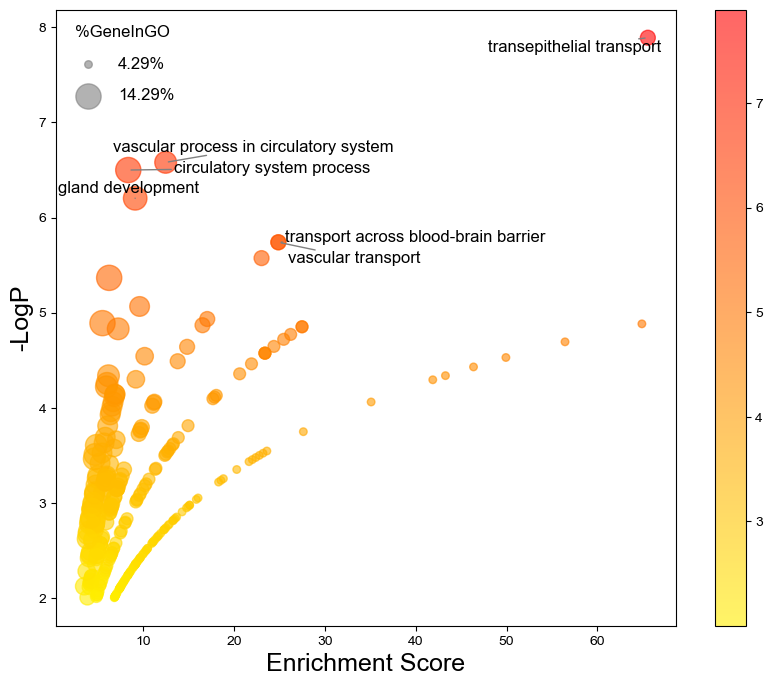

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from adjustText import adjust_text

plt.rcParams['font.family'] = 'Arial'

file_path = 'GO.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"错误: 文件 {file_path} 未找到。")
else:
    enrichment = data['Enrichment']
    logp_abs = data['LogP'].abs()
    percent_in_go = data['%InGO']
    descriptions = data['Description']

    min_val = percent_in_go.min()
    max_val = percent_in_go.max()
    scaled_percent_in_go = 300 * ((percent_in_go - min_val) / (max_val - min_val) + 0.1)

    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FFEE00', '#FF0000'])

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(enrichment, logp_abs, s=scaled_percent_in_go, c=logp_abs, cmap=cmap, alpha=0.6)

    cbar = plt.colorbar(scatter)
    
    high_logp_indices = logp_abs.nlargest(5, keep='all').index
    texts = []
    for idx in high_logp_indices:
        text = plt.text(enrichment[idx], logp_abs[idx], descriptions[idx], ha='center', va='center', fontsize=12)
        texts.append(text)

    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

    sample_sizes = [scaled_percent_in_go.min(), scaled_percent_in_go.max()]
    sample_labels = [f'{percent_in_go.min():.2f}%', f'{percent_in_go.max():.2f}%']
    for size, label in zip(sample_sizes, sample_labels):
        plt.scatter([], [], s=size, color='gray', alpha=0.6, label=label)
    legend = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='%GeneInGO', fontsize=12)
    legend.get_title().set_fontsize(12)  # 设置图例标题字体大小

    plt.xlabel('Enrichment Score', fontsize=18)
    plt.ylabel('-LogP', fontsize=18)

    save_path = 'GO.png'
    plt.savefig(save_path, dpi=600)
    print(f"图片已保存至 {save_path}")

    plt.show()
    